In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from xgboost import XGBClassifier

import sklearn
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import NearMiss, TomekLinks, ClusterCentroids
import pickle

In [ ]:
# Here, I am going to train the same ds using XGBoost that I used for the ANN

In [6]:
# load ing the DS and label encoding
df = pd.read_csv('classification_cleaned.csv')
with open('class_names.pkl', 'rb') as f:
    class_names = pickle.load(f)

In [7]:
df.shape

(90000, 5)

In [ ]:
# X and y
X = df.drop('class', axis=1)
y = df['class']

In [9]:
df['class'].value_counts()

class
0    58299
2    17773
1    13928
Name: count, dtype: int64

In [11]:
# Balacing the ds using NearMiss
nm = NearMiss(version=2)
X, y = nm.fit_resample(X, y)

In [12]:
print("X_train shape:", X.shape)
print("y_train shape:", y.shape)

X_train shape: (41784, 4)
y_train shape: (41784,)


In [15]:
# Splitting the ds into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(29248, 4)
(29248,)
(12536, 4)
(12536,)


In [ ]:
# Creating DMatrix objects for XGBoost
D_train = xgb.DMatrix(data=X_train, label=y_train)
D_test = xgb.DMatrix(data=X_test, label=y_test)

In [41]:
# Model parameters
params = {'max_depth': 10, 'objective': 'multi:softmax','num_class': 3 }

In [42]:
# Training the model
model = xgb.train(params, D_train)

In [43]:
# making predictions
predictions = model.predict(D_test)

In [44]:
# Evaluating the model using the classification report 
print(classification_report(y_test, predictions, target_names=class_names))

# get overall accuracy of the model and print it
acc = accuracy_score(y_test, predictions)
print("\nModel overall accuracy: {:.2f}%".format(acc * 100))

              precision    recall  f1-score   support

      GALAXY       0.96      0.98      0.97      4248
         QSO       0.98      0.95      0.97      4087
        STAR       0.99      1.00      1.00      4201

    accuracy                           0.98     12536
   macro avg       0.98      0.98      0.98     12536
weighted avg       0.98      0.98      0.98     12536


Model overall accuracy: 97.73%


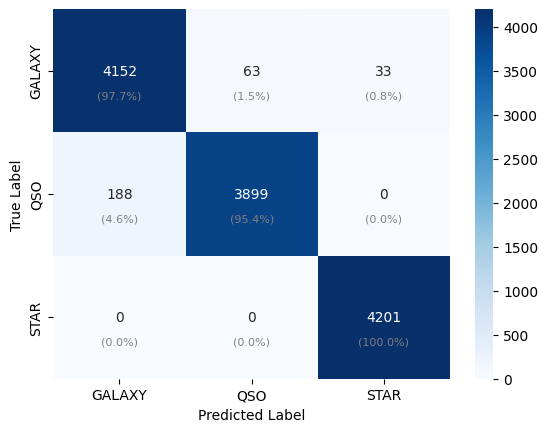

In [ ]:
Confusion_matrix = confusion_matrix(y_test, predictions)
Confusion_matrix_percent = Confusion_matrix.astype('float') / Confusion_matrix.sum(axis=1)[:, None] * 100
sns.heatmap(Confusion_matrix, fmt='d', annot=True, cmap='Blues', xticklabels=class_names, yticklabels=class_names)
# Adding new percentages to the confusion matrix
for  i in range(Confusion_matrix.shape[0]):
    for j in range(Confusion_matrix.shape[1]):
        plt.text(j + 0.5, i + 0.7, f'({Confusion_matrix_percent[i, j]:.1f}%)', 
                 ha='center', va='center', fontsize=8, color='gray')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show() 

In [ ]:
# What I learned, both ANN and XGBoost give me the same accuracy.